🚢 Titanic Dataset Analytics 🚢 @Keerati-Deja

1. Check for missing values (NaN) in each column
2. Analyze data in each (significant) column 
3. Deal with missing values (NaN) in each column

4. After dealing with NaN, reanalyze the most important column (Survived)

In [168]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# Original Dataset
df = pd.read_csv('titanic_dataset.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.3+ KB


In [171]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [172]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


NOTE:
Statistic values are available for columns containing numerical values only.

In [173]:
# List all columns in the dataset
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

📝 Column Description 📝

👉🏻 index 0 : pclass {1 = 1st, 2 = 2nd, 3 = 3rd} \
👉🏻 index 1 : survived {0 = no, 1 = yes} \
👉🏻 index 2 : name \
👉🏻 index 3 : sex {male, female} \
👉🏻 index 4 : age \
👉🏻 index 5 : sibsp (number of siblings/spouses abroad) \
👉🏻 index 6 : parch (number of parents/children abroad) \
👉🏻 index 7 : ticket \
👉🏻 index 8 : fare (passenger fare) \
👉🏻 index 9 : cabin \
👉🏻 index 10 : embarked (port of embarkation) {C = Chernourg, Q = Queenstown, S = Southhampton}\
👉🏻 index 11 : boat (life boat -- if survived) \
👉🏻 index 12 : body (body number -- if not survived and body was recovored) \
👉🏻 index 13 : home.dest 


pclass 1 = Upper 2 = Middle 3 = Lower \
age = จะเป็น fractional ถ้าอายุน้อยกว่า 1 ขวบ(เลยเห็นเป็นทศนิยมบ้าง) ถ้าอายุเป็นประมาณจะอยู่ในรูป เลข.5 \
sibsp = ครอบครัวและญาติ sibling(brother/sister/stepbro/stepsis)spouse(husband/wifeแต่ไม่รวมmistressesและfiances) \
parch = parent(mother/father)child(son/daughter/stepson/stepdaug)เด็กบางคนเดินทางกับnannyก็เลยมีค่าparche=0 \

อะไรสำคัญบ้าง ชื่ออาจจะมี (ฐานะทางสังคม/ชาติตระกูล)ตระกูลผู้ดีก็น่าจะรวยพอจ่ายชั้น1 แต่ไม่น่ามีผลไรขนาดนั้น เลขตั๋วก็ไม่น่าสำคัญเท่าค่าตั๋วที่ผู้โดยสารนั้นจ่าย 


1️⃣ Check for missing values (NaN) in each column

Text(0.5, 1.0, 'Missing Values Heatmap')

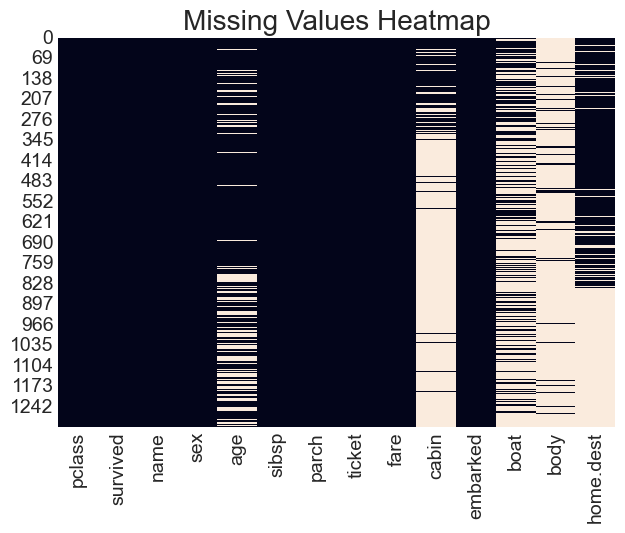

In [174]:
# Visualize the NaN with heatmap (seaborn)
df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing Values Heatmap")

In [175]:
# Check if NaN and count (by sum)
(df.isnull() | df.empty | df.isna()).sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Analyze Missing Values

embarked : NaN = 2 \
fare : NaN = 1 \
age : NaN = 263 

cabin : NaN = 1014 \
boat      : NaN = 823 \
body      : NaN = 1188 \
home.dest : NaN = 564 

1️⃣ Analyze data in each column

Embarked \
👉🏼 Embarkation (from where did the passenger get on the ship)

In [176]:
# Check stat from the dataset

# Group by the column and count occurrences
count_emb = df['embarked'].value_counts().reset_index()

# Rename the columns for better understanding
count_emb.columns = ['value', 'count']

# Calculate percentage
count_emb['percentage'] = (count_emb['count'] / count_emb['count'].sum()) * 100

# Display the result
count_emb

,value,count,percentage
0,S,914,69.931140
1,C,270,20.657995
2,Q,123,9.410865


It seems most passengers embarked at Southhampton(S).🤔\
Therefore, if there are some missing values, replacing NaN w/ S would be a good idea. 👌🏼

Fare\
👉🏼 How much did the passengers pay\
First Class (1st) paid more\
Third Class (3rd) paid less

In [177]:
# There is only 1 missing value in the fare column
# Find out which pclass it is

# Find NaN values in the specified column ---> find index
nan_fare_index = df[df['fare'].isna()].index

# Get the values in another column corresponding to the NaN index
nan_fare_pclass = df.loc[nan_fare_index, 'pclass']

print(nan_fare_pclass)

1225    3.0
Name: pclass, dtype: float64


In [178]:
# The missing value is in the 3rd pclass

# Find median of fare in each class
# Group by 'Pclass' and calculate the median fare for each group
median_fare_pclass = df.groupby('pclass')['fare'].median()

print("Median Fare for each Pclass:")
print(median_fare_pclass)

Median Fare for each Pclass:
pclass
1.0    60.0000
2.0    15.0458
3.0     8.0500
Name: fare, dtype: float64


In [179]:
median_fare_3rd_class = df[df['pclass'] == 3]['fare'].median()

print("Median Fare for 3rd Class:")
print(median_fare_3rd_class)

Median Fare for 3rd Class:
8.05


age

In [180]:
# Find median age of all passengers
median_age_all = df['age'].median()

print("Median age of all passengers:")
print(median_age_all)

Median age of all passengers:
28.0


In [181]:
# Find median age of each pclass

# Group by 'Pclass' and calculate the median age for each group
median_age_pclass = df.groupby('pclass')['age'].median()

print("Median age for each Pclass:")
print(median_age_pclass)

Median age for each Pclass:
pclass
1.0    39.0
2.0    29.0
3.0    24.0
Name: age, dtype: float64


In [182]:
# Other descriptive stats

# Age and sex in each pclass
# distribution? ---> viz

pclass {1st, 2nd, 3rd} \
This feature renders the passenger division. The tourists could opt from three distinct sections, namely class-1, class-2, class-3. The third class had the highest number of commuters, followed by class-2 and class-1. The number of tourists in the third class was more than the number of passengers in the first and second class combined. The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler.

In [183]:
# Count number of passengers in each class

# Group by the column and count occurrences
count_pclass = df['pclass'].value_counts().reset_index()

# Rename the columns for better understanding
count_pclass.columns = ['Pclass', 'Number']

# Calculate percentage
count_pclass['Percentage'] = (count_pclass['Number'] / count_pclass['Number'].sum()) * 100

# Display the result
count_pclass

,Pclass,Number,Percentage
0,3.0,709,54.163484
1,1.0,323,24.675325
2,2.0,277,21.161192


In [184]:
# Stats for pclass

2️⃣ Deal with NaN

embarked --> if NaN, assume that embarked at Southhampton(S) ✅\
fare     --> fillna with median (of its pclass) ✅\
age      --> fillna with median (of all passengers or of its pclass 🤔) ✅ 


cabin     --> Maybe UNNECESSARY 👋 \
boat      --> Maybe UNNECESSARY 👋 \
body      --> Maybe UNNECESSARY 👋 \
home.dest --> Maybe UNNECESSARY 👋

In [185]:
# copy dataset instead of directly adjust (preventive)
df_clean = df.copy()

In [211]:
# Deal with NaN in the embarked column

# fillna with S
df_clean['embarked'] = df.embarked.fillna('S')

# Check for NaN
EmbarkedNaN = df_clean['embarked'].isna().sum()
print(f'There are {EmbarkedNaN} missing values in embarked column.')

There are 0 missing values in embarked column.


In [212]:
# Deal with NaN in the fare column

# fillna with median of its pclass (3rd)
median_fare_3rd_class = df[df['pclass'] == 3]['fare'].median()
df_clean['fare'] = df.fare.fillna(median_fare_3rd_class) 

# Check for NaN
FareNaN = df_clean['embarked'].isna().sum()
print(f'There are {FareNaN} missing values in fare column.')

There are 0 missing values in fare column.


In [213]:
# Deal with NaN in the age column

# fillna with median age (of all passengers)
df_clean['age'] = df.age.fillna(df.age.median())  

# Check for NaN
AgeNaN = df_clean['age'].isna().sum()
print(f'There are {AgeNaN} missing values in fare column.')

There are 0 missing values in fare column.


In [189]:
df_clean.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [190]:
df_clean.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

Analyze each feature

MOST IMPORTANT !

📈 Survived 📉 

C:\Users\Dell\AppData\Local\Temp\ipykernel_4296\268617178.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu")  # Yellow-Green-Blue


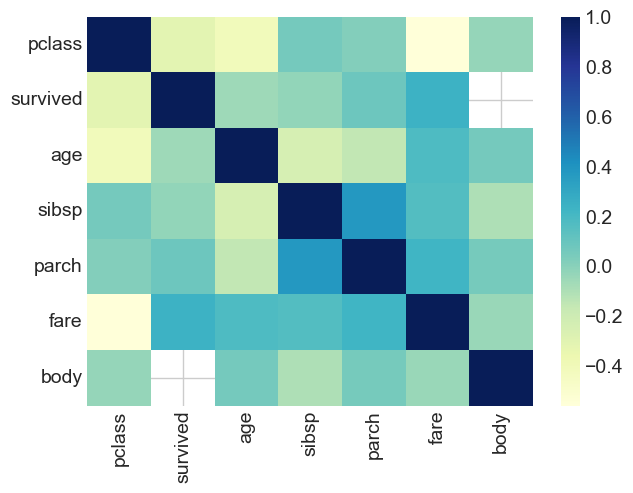

In [191]:
# plot simple correlation heatmap (of the original dataset)
import seaborn as sns

sns.heatmap(df.corr(), cmap="YlGnBu")  # Yellow-Green-Blue
plt.show()

From heatmap of correlation

Survived-Pclass\
Negative Correlation = inverse variation\
It makes sense because people in the less number of pclass (1) paid more than people in the third(3) class.\
From the heatmap it could be assumed that people in the lower number of pclass (1) tend to survive\
while people in the higher number of pclass (3) tend to die.

Survived-Age\
It seems they don't correlate each other much. (0 or near zero)

Survived-Fare\
Positive Correlation = direct variation\
Pay more, survive more. Pay less, survive less. That's all.

⚠️ But this heatmap lacks of Sex feature which could be important.🚻


In [192]:
# Adapt the Sex column of clean dataset ---> make it numeral
df_clean_x = df_clean.copy()
df_clean_x['sex'] = df_clean['sex'].replace({'male': 1.0, 'female': 0.0})

df_clean_x['sex']

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1304    0.0
1305    0.0
1306    1.0
1307    1.0
1308    1.0
Name: sex, Length: 1309, dtype: float64

C:\Users\Dell\AppData\Local\Temp\ipykernel_4296\2231692806.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean_x.corr(), cmap="YlGnBu")  # Yellow-Green-Blue


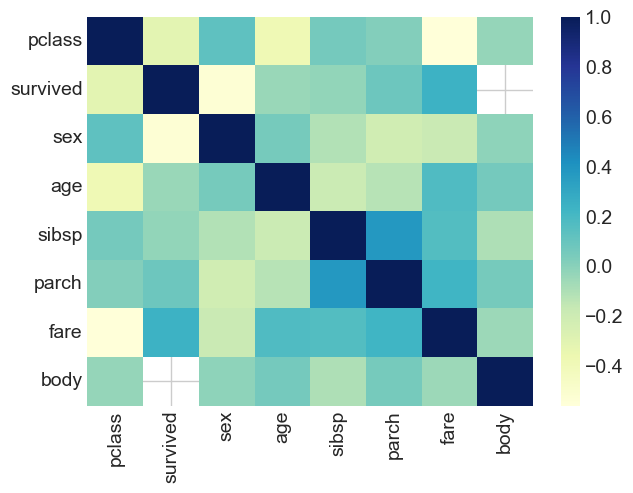

In [193]:
# Replot the heatmap
# plot simple correlation heatmap (of the adapted_x dataset)
import seaborn as sns

sns.heatmap(df_clean_x.corr(), cmap="YlGnBu")  # Yellow-Green-Blue
plt.show()

From heatmap of correlation (adapted dataset)

Survived-Pclass\
Negative Correlation = inverse variation\
It makes sense because people in the less number of pclass (1) paid more than people in the third(3) class.\
From the heatmap it could be assumed that people in the lower number of pclass (1) tend to survive\
while people in the higher number of pclass (3) tend to die.

Survived-Age\
It seems they don't correlate each other much. (0 or near zero)

Survived-Fare\
Positive Correlation = direct variation\
Pay more, survive more. Pay less, survive less. That's all.

Survived-Sex\
Strongly Negative Correlation = inverse variation\
Since \
survived = 0.0 (died), survived = 1.0 (lived)\
sex = 0.0 (famale), sex = 1.0 (male)\
which means the lower number of sex, the more chance to survive.(female passengers tends to be survived)

Survived-Pclass 

Hypothesis:\
Rich people might have more chance to survive.\
Poor people might die more.

In [194]:
import matplotlib.pyplot as plt

df_pie = df_clean.copy()
df_pie['survived'] = df_pie['survived'].replace({0.0: 'Died', 1.0: 'Survived'})

# Group by the 'status' column and count occurrences
grouped_df_pie = df_pie.groupby('survived').size().reset_index(name='count')

# Display the result
grouped_df_pie

,survived,count
0,Died,809
1,Survived,500


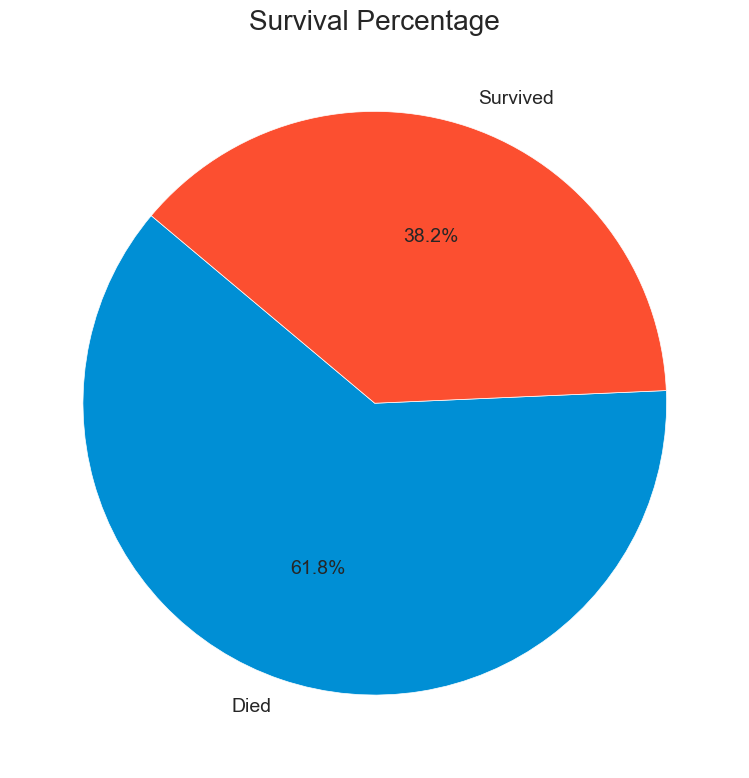

In [195]:
# Survived Viz

# Count the occurrences of each label
# calculates the counts of each unique value in the 'survived' column. It gives you the number of occurrences for 'Survived' and 'Died'.
label_counts = df_pie['survived'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
# the code creates a pie chart using plt.pie(). It takes the counts (label_counts) and corresponding labels (label_counts.index). 
#The autopct parameter formats the label with a percentage, and startangle sets the starting angle of the pie chart.
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)

#sets the style of the plot. In this case, it's using the "fivethirtyeight" style, which is a popular style known for its clean and modern appearance.
plt.style.use("fivethirtyeight")
# title name for the head of table
plt.title("Survival Percentage")
# make default padding looks nice  adjusts the spacing between subplots to make the layout more visually appealing.
plt.tight_layout()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_4296\807650160.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue='sex', data=df, ax=axis, ci=None)


Text(0.5, 0, '')

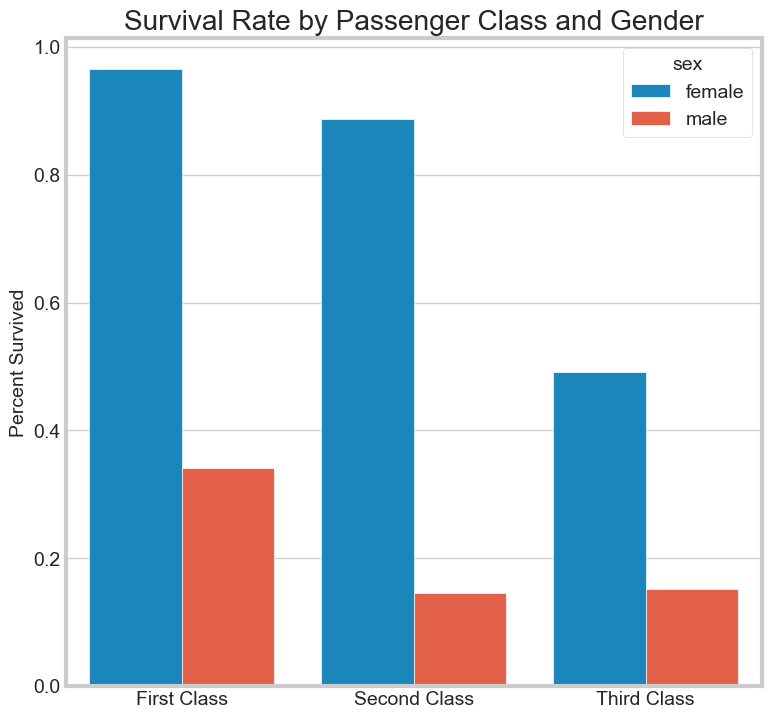

In [196]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='pclass', y='survived', hue='sex', data=df, ax=axis, ci=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')

In [197]:
df_clean

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,28.0000,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [155]:
# Binning for age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df_clean_bins['age_binned'] = pd.cut(df_clean.age, bins, right=True, include_lowest=False)
# child variable
df_clean['child'] = (df_clean.age < 16).astype(int)
surv = df_clean[df_clean.survived == 1]

order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

Text(0, 0.5, '')

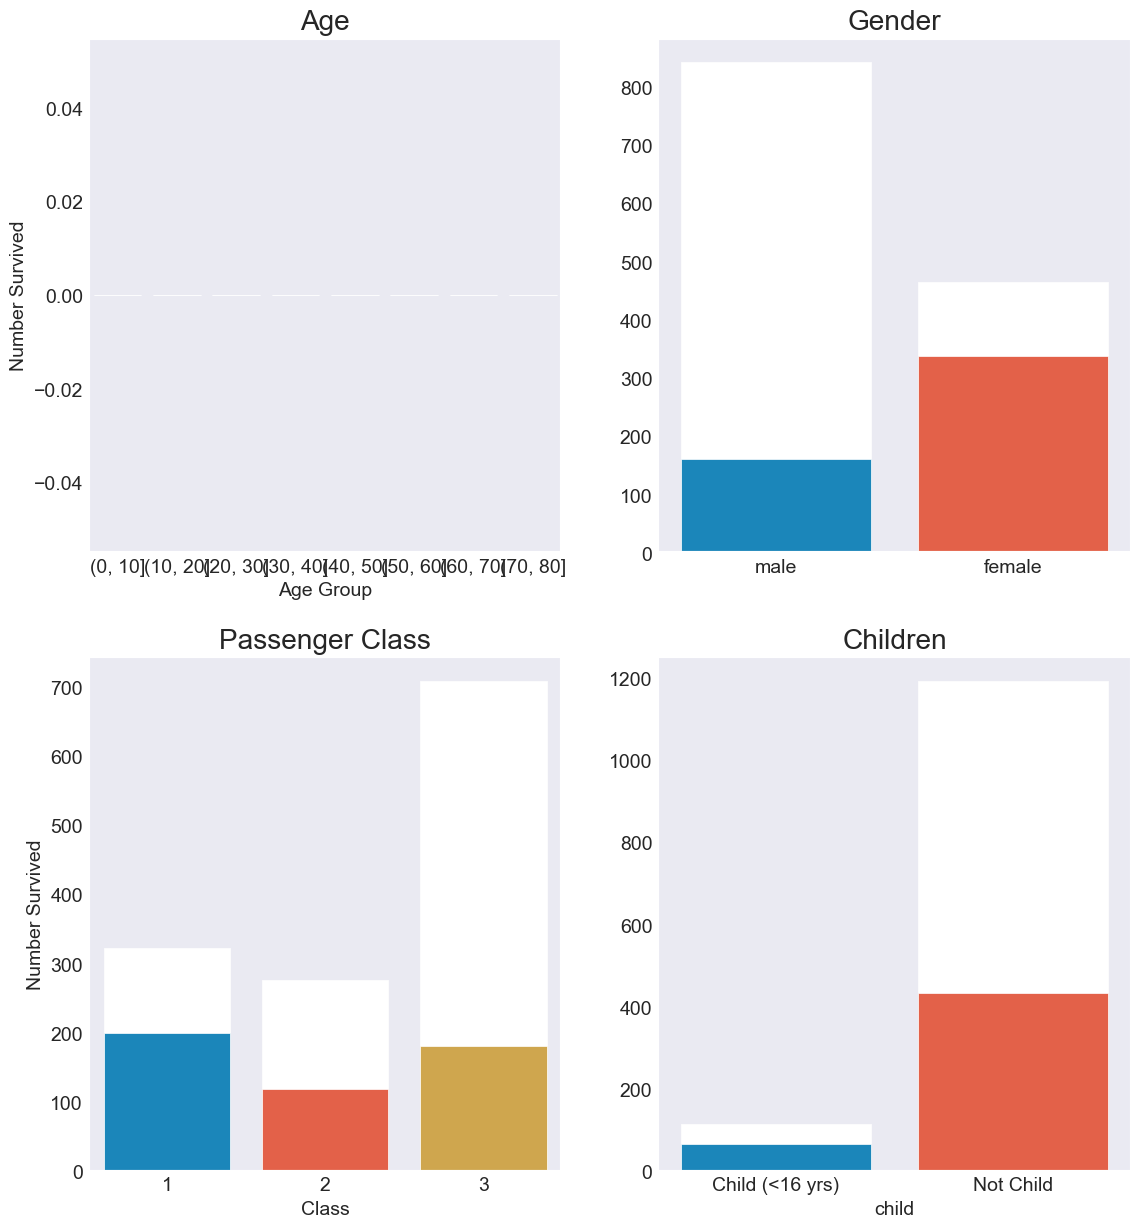

In [163]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))

sns.set_style('dark')
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

# 1st Graph
sns.countplot(x='age_binned', color='white', ax=ax1, data=df_clean, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')  
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')

# 2nd Graph
sns.set_style('dark')
sns.countplot(x='sex', color='white', ax=ax2, data=df_clean, order=['male','female'])
sns.countplot(x='sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

# 3rd Graph
sns.countplot(x='pclass', color='white', ax=ax3, data=df_clean,  order=[1, 2, 3])
sns.countplot(x='pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')

# 4th Graph
sns.countplot(x='child', color='white', ax=ax4, data=df_clean, order=[1,0])
sns.countplot(x='child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

จาก heatmap 
สิ่งที่เราสนใจคือจะ predict survived เราไม่ได้แคร์อย่างอื่นเช่นage correlateกับsibsp \

negative correlated (-) is equally interesting as possitive correlated (+) ปัญหาคือมันไม่บอกอะไรมากเมื่อค่ามันใกล้ 0 เพราะ 0หมายถึงประมาณว่า random stuff ส่วน 1 คือมีความแปรผันตรงกัน -1 คือมีความแปรผกผันกัน 

survived correlate กับตัวมันเองเลยเป็น 1 แต่ละตัวจะเป็นเส้นแทยง diagonal 

pclass กับ survived เป็น highly negative correlated ก็คือแปรผกผันกัน ก็คือยิ่งเลขpclassต่ำ(ชั้น1)จะยิ่งมีโอกาสรอดสูง \
fare กับ survived ก็เป็น positive แรง ก็คือยิ่งจ่ายแพง ยิ่งรอดฃ
ดูpclassกับfare เป็น neg แรง ก็เมคเซ้นเพราะ ยิ่งจ่ายถูกยิ่งได้ชั้น3

แต่ในแมปไม่มีเพศ เพราะมันไม่ใช่เลข ก็เปลี่ยนdataนิดหน่อย

Categories 

Further, to understand the categorical and non-categorical features, I had a look at the number of unique values each column had. The attributes ‘Sex’ and ‘Survived’ had two possible values, properties ‘Embarked’ & ‘Pclass’ had three possible values.

In [ ]:
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

Features

After getting a better perception of the different aspects of the dataset, I started exploring the features and the part they played in the survival or demise of a traveler.

1. Survived

The first feature reported if a traveler lived or died. A comparison revealed that more than 60% of the passengers had died.

2. Pclass


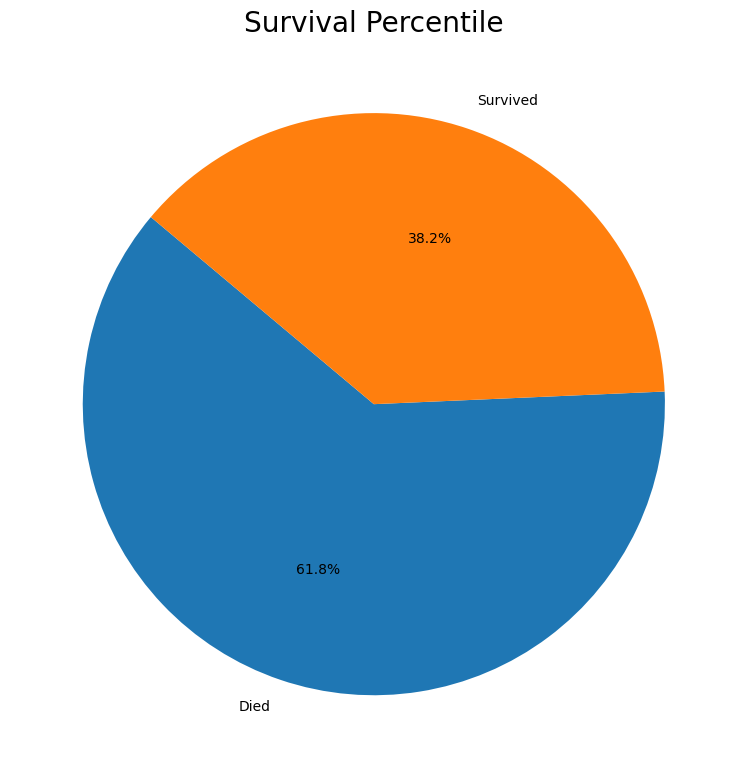

In [15]:
# Survived Viz
import matplotlib.pyplot as plt
# or from matplotlib import pyplot as plt

# creates a copy of the original DataFrame df. This is a good practice to avoid modifying the original DataFrame when creating additional columns or making changes.
df_pie = df.copy()
# Map values to labels
# The mapping assigns the label 'Survived' for a value of 1.0 and 'Died' for a value of 0.0.
df_pie['survived'] = df['survived'].map({1.0: 'Survived', 0.0: 'Died'})

# Count the occurrences of each label
# calculates the counts of each unique value in the 'survived' column. It gives you the number of occurrences for 'Survived' and 'Died'.
label_counts = df_pie['survived'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
# the code creates a pie chart using plt.pie(). It takes the counts (label_counts) and corresponding labels (label_counts.index). 
#The autopct parameter formats the label with a percentage, and startangle sets the starting angle of the pie chart.
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)

"""
    label_counts: This is the array or sequence containing the values to be plotted in the pie chart. In this case, 
    it's the counts of each unique value in the 'survived' column.

    labels=label_counts.index: This parameter specifies the labels for each wedge in the pie chart. In this case, 
    it uses the index of the label_counts series, which represents the unique values ('Survived' and 'Died').

    autopct='%1.1f%%': This parameter controls the formatting of the labels on each wedge. 
    The %1.1f%% specifies that the labels should be formatted as floating-point numbers with one digit before the decimal point and one digit after, 
    followed by a percentage sign.

    startangle=140: This parameter sets the starting angle for the pie chart. 
    The default starting angle is 0 degrees, and it increases counterclockwise. 
    In this case, it starts at 140 degrees, which can be used to rotate the pie chart if needed for better visualization.

So, when you put it all together, this line is creating a pie chart with counts as values, 
using the labels from the index of the label_counts series, formatting the labels as percentages, and starting the first wedge at an angle of 140 degrees.
"""

#sets the style of the plot. In this case, it's using the "fivethirtyeight" style, which is a popular style known for its clean and modern appearance.
plt.style.use("fivethirtyeight")
# title name for the head of table
plt.title("Survival Percentile")
# make default padding looks nice  adjusts the spacing between subplots to make the layout more visually appealing.
plt.tight_layout()
# show graph
plt.show()

# colors:
# blue : #008fd5
# red : #fc4f30
# yellow : #e5ae37
# green : #6d904f

3. Sex

Approximately 65% of the tourists were male while the remaining 35% were female. Nonetheless, the percentage of female survivors was higher than the number of male survivors. More than 80% of male commuters died, as compared to around 70% female commuters.

4. Age

The youngest traveler onboard was aged around two months and the oldest traveler was 80 years. The average age of tourists onboard was just under 30 years. Clearly, a larger fraction of children under 10 survived than died. or every other age group, the number of casualties was higher than the number of survivors. More than 140 people within the age group 20 and 30 were dead as compared to just around 80 people of the same age range sustained.

5. SibSp

SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler. More than 90% of people traveled alone or with one of their sibling or spouse. The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

6. Parch

Similar to the SibSp, this feature contained the number of parents or children each passenger was touring with. A maximum of 9 parents/children traveled along with one of the traveler.

I added the number of ‘Parch’ and ‘SibSp’ values to store in a new column named ‘Family’

